# Named Entity Recognition module
This notebook will hold information and guides on how to use this module to do NER on a prepared dataset of dialogues.

In [1]:
## To enable reloading of modules after updates:
%load_ext autoreload
%autoreload 2

First importing spaCy which will be used for training and using one of their pretrained models. 
Here we also check which pipelines are available in the loaded model. Here it's important to find the NER model which we will be using for this task.

In [2]:
# if en is not found uncomment the following line:
#!python -m spacy download en_core_web_md

from Models.NER_classification.spaCy_NER import NER_Classifier
baseline_model = NER_Classifier()


## Loading the training dataset

In [3]:
from Dataset.dataset import Data
dataset = Data("./Dataset/dialogues.json")

Make sure the read trainingset is loaded as intended, gather a index and check inside.

In [4]:
def check_dialogue():
    print(dataset.example)

check_dialogue()

('baby vts ostergotland vts ostergotland baby baby close by fina fyren  there hauls spætten shangrila anton anchor away outbound  reading places canal. outbound vessel sharky in close proximity fula fyren also stjernen inbound with direction for easy . outbound vessel strudsen at fina fyren.  3 vessels outbound noted . ', {'entities': [('baby', 0, 4, 'COM'), ('baby', 39, 43, 'COM'), ('baby', 44, 48, 'COM'), ('canal', 143, 148, 'GPE'), ('fina fyren', 58, 68, 'IPL'), ('fina fyren', 279, 289, 'IPL'), ('fula fyren', 192, 202, 'IPL'), ('sharky', 166, 172, 'COM'), ('spætten shangrila anton', 82, 105, 'COM'), ('stjernen', 208, 216, 'COM'), ('strudsen', 267, 275, 'COM'), ('vts ostergotland', 5, 21, 'COM'), ('vts ostergotland', 22, 38, 'COM')]}, {'cats': {'traffic information': 1, 'inbound': 0, 'outbound': 0, 'pilot required': 0}})


## Split the dataset 
Create the training, validation and testdataset.

In [4]:
training = dataset.training_set

gen_validation = dataset.validation_set
gen_test = dataset.test_set


# Add the validation data which are the transcribed dataset
validation_dataset = Data("Dataset/transcribed_dialogues.json")
validation = validation_dataset.full_data[:int(len(validation_dataset.full_data)*0.30)]
test = validation_dataset.full_data[int(len(validation_dataset.full_data)*0.30):]


## Baseline recognition
Here we can find a baseline implementation where we have not added any entities to the model or made any futher training to the pretrained model. 

In [6]:
def baseline():
    sentence = dataset.example[0]
    sequence = baseline_model.predict(sentence)

    for entity in sequence.ents:
        print(entity.text, entity.label_)
    
    print()
    print("The sentence is: ", sentence)

baseline()


anton PERSON
3 CARDINAL

The sentence is:  baby vts ostergotland vts ostergotland baby baby close by fina fyren  there hauls spætten shangrila anton anchor away outbound  reading places canal. outbound vessel sharky in close proximity fula fyren also stjernen inbound with direction for easy . outbound vessel strudsen at fina fyren.  3 vessels outbound noted . 


## To compare the baseline to the improved version we will use an accuracy function which will check how many of the existing entities it actually did classify.

In [7]:
baseline_model.add_entities(test)
baseline_model.accuracy(test)

0.0

# Improving the baseline
With the labels now prepared we wil add the new labels to the current set of entities and see how this changes this result. 

## Add the required NEs
Here we only add the entities which are found within the training dataset. 

In [8]:
improved_model = NER_Classifier()
improved_model.add_entities(training)

## Trainingloop based on spaCy

/home/vscode/.local/lib/python3.9/site-packages/spacy/training/iob_utils.py:139: UserWarning: [W030] Some entities could not be aligned in the text "vts ostergotland makaira makaira replying you wen ..." with entities "[(120, 123, 'IPL'), (104, 110, 'COM'), (69, 77, 'G...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/vscode/.local/lib/python3.9/site-packages/spacy/training/iob_utils.py:139: UserWarning: [W030] Some entities could not be aligned in the text "suzie x vts ostergotland vts ostergotland suzie x ..." with entities "[(125, 134, 'COM'), (476, 498, 'COM'), (385, 397, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/vscode/.local/lib/python3.9/site-packages/spacy/training/iob_utils.py:139: UserWarning: [W030] Som

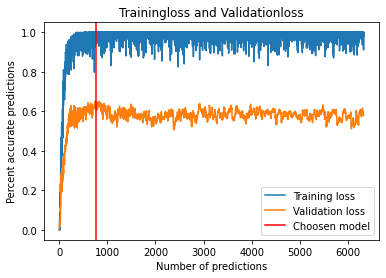

In [9]:
improved_model.train(training, validation, show_loss=True, show_graph=True, save=True)


In [10]:
# TEST DATA
improved_model.accuracy(test)

0.6153846153846154

# The final dataset
This is handtranscribed data from the audio data which have been labeled through the datagenerator process.

In [12]:
model = NER_Classifier()
model.load_model("./Models/NER_classification/NER_Models/model")

print("Precision: ", model.evaluate(model.model.tokenizer, model.model.get_pipe("ner"), [val[0] for val in test], 
                                                                    [val[1] for val in test ], "entities")['precision']*100, "%")

print("F score: ", model.evaluate(model.model.tokenizer, model.model.get_pipe("ner"), [val[0] for val in test], 
                                                                    [val[1] for val in test ], "entities")['f_score']*100, "%")

Precision:  62.890624997543334 %
F score:  60.299625465906374 %


## Validation with the generated dataset

/home/vscode/.local/lib/python3.9/site-packages/spacy/training/iob_utils.py:139: UserWarning: [W030] Some entities could not be aligned in the text "suzie x vts ostergotland vts ostergotland suzie x ..." with entities "[(125, 134, 'COM'), (476, 498, 'COM'), (385, 397, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/vscode/.local/lib/python3.9/site-packages/spacy/training/iob_utils.py:139: UserWarning: [W030] Some entities could not be aligned in the text "jeanette ad vts ostergotland vts ostergotland jean..." with entities "[(168, 175, 'COM'), (206, 218, 'COM'), (80, 90, 'I...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/vscode/.local/lib/python3.9/site-packages/spacy/training/iob_utils.py:139: UserWarning: [W030] Som

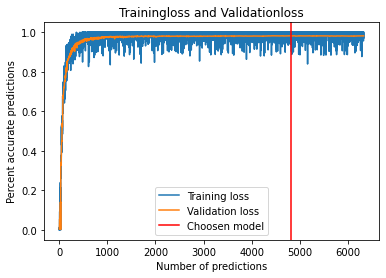

In [5]:
gen_model = NER_Classifier()
gen_model.add_entities(training)
gen_model.train(training, gen_validation, show_loss=True, show_graph=True)

In [6]:

print("Precision: ", gen_model.evaluate(gen_model.model.tokenizer, gen_model.model.get_pipe("ner"), [val[0] for val in gen_test], 
                                                                    [val[1] for val in gen_test ], "entities")['precision']*100, "%")

print("F score: ", gen_model.evaluate(gen_model.model.tokenizer, gen_model.model.get_pipe("ner"), [val[0] for val in gen_test], 
                                                                    [val[1] for val in gen_test ], "entities")['f_score']*100, "%")

Precision:  99.45450578202171 %
F score:  98.94713991078055 %
